## Cho dữ liệu sklearn.datasets.fetch_20newsgroups chứa các văn bản ngắn được phân chia thành 20 loại khác nhau.
## Yêu cầu: Đọc dữ liệu của 3 loại là 'comp.graphics', 'rec.sport.baseball', 'sci.electronics'; chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán Naive Bayes để thực hiện việc dự đoán một văn bản thuộc vào loại nào trong ba loại nói trên.
1. Lấy train.data, train.target, test.data, test.target từ dữ liệu trên.
2. Áp dụng thuật toán Naive Bayer => kết quả
3. Đánh giá mô hình
4. Ghi mô hình
5. Đọc mô hình vừa ghi => dự đoán kết quả cho câu 6
6. Cho dữ liệu Test: X_new = np.array(['The field is considered a subset of visual communication and communication design. They use typography, visual arts, and page layout techniques to create visual compositions.', 'Clubs are conducting Summer Camp at the ballparks in their home cities (not their Spring Training facilities).', 'NXP claims to be first to deliver in-vehicle multi-device simultaneous wireless charging driven by a single MWCT controller. NXP has expanded its offerings to the 15W wireless power standard, enabling faster charging.']) => sẽ là văn bản thuộc các loại nào?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn. metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score, roc_curve

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.electronics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
type(train.data)

list

In [5]:
len(train.data)

1772

In [6]:
train.data[0]

"From: wellison@kuhub.cc.ukans.edu\nSubject: Re: electronic odometers\nArticle-I.D.: kuhub.1993Apr15.153153.49197\nOrganization: University of Kansas Academic Computing Services\nLines: 10\n\nI had the insturment panel go out in my car (a 1990 Lincoln Contenintal) which\nis a digital dash. They replaced the whole thing with a 1991 dash (thank god it\nwas under the warrenty ! :-) Anyway, the odometer was reading the exact milage\nfrom the old panel. It must have a EEPROM of some sort in it that is up-dated.\nSeems to me that removing the battery would erase it, but it doesn't. So I\nguess they swapped the NVM chip (non-volitile memory) and installed it in the\nnew dash. No, they wouldn't let me have the old dash to tinker with :-(\n\n\n-=-= Wes =-=-\n"

In [7]:
train.target[0]

2

In [8]:
type(train.target)

numpy.ndarray

In [9]:
train.target

array([2, 1, 0, ..., 0, 1, 1], dtype=int64)

In [10]:
unique_elements, counts_elements = np.unique(train.target, return_counts=True)
print("Frequency of each category (train):")
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category (train):
[[  0   1   2]
 [584 597 591]]


In [11]:
len(test.data)

1179

In [12]:
test.data[100]

"From: 9130037@golum.riv.csu.edu.au (CHAN Yin Mei)\nSubject: help! colour display restriction/limitation\nOriginator: 9130037@golum.riv.csu.edu.au\nOrganization: Charles Sturt University - Riverina, Wagga Wagga, NSW, Australia\nLines: 29\n\nhi netters,\n\n\tI'm doing a project which is about image analysis.  Firstly, I\nhave to find out any restrictions or limitations on the colour display\non various kind of workstations, they are DECstation, HP, Amiga, Apollo.\n\n\tSecondly, I read from some graphic texts that image is displayed\nin 24 bites(please point out to me if I got it wrong).  But, the images\nwhich I will deal with are displayed in 16 bites by the software they\nare using currently.  So, will there be any problems to display them\nunder X-windows in the future? Because we are thinking to implement the\nGUI by X-windows for our project\n\n\n\tIs there any person here can help me to solve the problem or\nquery above?  Or, give me some advice or suggestion where I can find\nthe

In [13]:
test.target[100]

0

### Pre-processing data

In [14]:
count = CountVectorizer()
count.fit(train.data)
bag_of_words_train = count.transform(train.data)
bag_of_words_train

<1772x26378 sparse matrix of type '<class 'numpy.int64'>'
	with 226969 stored elements in Compressed Sparse Row format>

In [15]:
bag_of_words_test = count.transform(test.data)
bag_of_words_test

<1179x26378 sparse matrix of type '<class 'numpy.int64'>'
	with 154176 stored elements in Compressed Sparse Row format>

In [16]:
X_train = bag_of_words_train.toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_train.shape

(1772, 26378)

In [18]:
X_test = bag_of_words_test.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X_test.shape

(1179, 26378)

In [20]:
y_train = np.array(train.target)

In [21]:
y_train.shape

(1772,)

In [22]:
y_test = np.array(test.target)

In [23]:
y_test.shape

(1179,)

### Build model

In [24]:
nb = MultinomialNB()
model = nb.fit(X_train, y_train)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print('score Scikit learn - train: ', model.score(X_train,y_train))
print('score Scikit learn: ', model.score(X_test,y_test))
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%")

score Scikit learn - train:  0.9971783295711061
score Scikit learn:  0.9431721798134012
Accuracy is  94.31721798134012 %


In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[364,   3,  22],
       [  4, 392,   1],
       [ 37,   0, 356]], dtype=int64)

<AxesSubplot:>

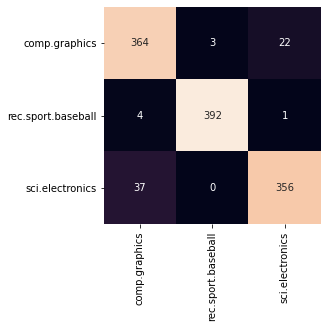

In [28]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       389
           1       0.99      0.99      0.99       397
           2       0.94      0.91      0.92       393

    accuracy                           0.94      1179
   macro avg       0.94      0.94      0.94      1179
weighted avg       0.94      0.94      0.94      1179



### Nhận xét: Có precision cao, recall cao

In [30]:
y_prob = model.predict_proba(X_test)
y_prob

array([[1.00000000e+00, 3.42558816e-40, 3.42505634e-11],
       [8.36429377e-15, 3.58304405e-17, 1.00000000e+00],
       [6.56547024e-19, 1.55118818e-25, 1.00000000e+00],
       ...,
       [1.29684570e-32, 3.82855312e-34, 1.00000000e+00],
       [3.72461935e-34, 1.72589031e-52, 1.00000000e+00],
       [2.44615747e-25, 7.21330233e-70, 1.00000000e+00]])

## Dựa trên tất cả các đánh giá => Model phù hợp

In [31]:
pkl_filename = "newsgroups_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
    # luu model CountVectorizer (count) theo cach tren

In [32]:
# Đọc model
with open(pkl_filename, 'rb') as file:
    ham_spam_model = pickle.load(file)
    # doc model count len

In [33]:
X_new = np.array(['The field is considered a subset of visual communication and communication design. They use typography, visual arts, and page layout techniques to create visual compositions.', 
                  'Clubs are conducting Summer Camp at the ballparks in their home cities (not their Spring Training facilities).', 
                  'NXP claims to be first to deliver in-vehicle multi-device simultaneous wireless charging driven by a single MWCT controller. NXP has expanded its offerings to the 15W wireless power standard, enabling faster charging.'])
X_new = count.transform(X_new)

In [34]:
y_pred_new = ham_spam_model.predict(X_new)
y_pred_new

array([0, 1, 2], dtype=int64)